In [1]:
%load_ext autoreload
%autoreload 2
from src import ast_diffs, ast_viz
import ast
import os.path as osp
import pickle 

from src.boba.parser import Parser
from src.utils import VIZ_DIR, DATA_DIR, save_viz_code_pdf

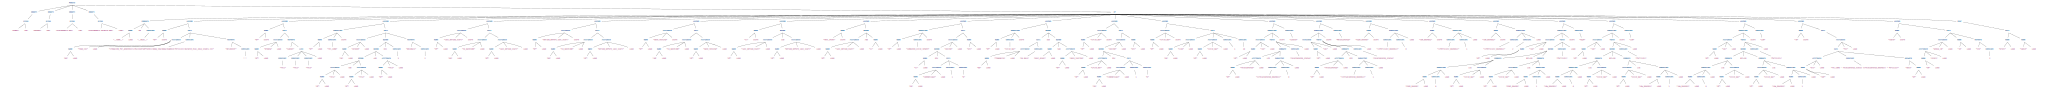

In [26]:
DATASET = 'fertility'
EXT = 'py'
script = osp.join(DATA_DIR, DATASET, f'template.{EXT}')
out = osp.join(DATA_DIR, DATASET)

save_file = osp.join(DATA_DIR, f'{DATASET}_template_parser_obj_0718.pickle')

if not osp.exists(save_file):
    ps = Parser(script, out, None)
    ps.main()

    with open(save_file, 'wb') as f:
        pickle.dump(ps, f)
with open(save_file, 'rb') as f:
    ps = pickle.load(f)
    
svg, graph = ast_viz.render(ps.paths_ast[0], ast_viz.my_settings)
svg

In [32]:
fpath ='[redacted_for_anonymity]/MultiverseProject/MultiverseTooling/multiverse-tooling/data/fertility/multiverse/code/universe_3.py'
with open(fpath, 'r') as f:
    changed_code = f.read()
svg, graph = ast_viz.render(ast.parse(changed_code), ast_viz.my_settings)
type(graph)

graphviz.graphs.Graph

In [37]:
save_path = osp.join(VIZ_DIR, 'compare_ast_func.pdf')
code = """
def compare_ast(node1: Union[ast.expr, List[ast.expr]], node2: Union[ast.expr, List[ast.expr]]) -> bool:
    if type(node1) is not type(node2):
        return False

    if isinstance(node1, ast.AST):
        for k, v in vars(node1).items():
            if k in {"lineno", "end_lineno", "col_offset", "end_col_offset", "ctx"}:
                continue
            if not compare_ast(v, getattr(node2, k)):
                return False
        return True

    elif isinstance(node1, list) and isinstance(node2, list):
        return all([compare_ast(n1, n2) for n1, n2 in zip_longest(node1, node2)])
    else:
        return node1 == node2"""
save_viz_code_pdf(code, save_path)

In [38]:
save_path = osp.join(VIZ_DIR, 'hurricane_funcs_and_lines.pdf')
code = """def cross_validate(df, formula, y_col, score_func, scaler, inverse_transform_func=None, folds=5):
	kf = KFold(n_splits=folds, random_state=None, shuffle=False)
	all_preds = []
	all_true = []
	for train_index, test_index in kf.split(df):
		df_train = df.iloc[train_index]
		df_test = df.iloc[test_index].copy().reset_index()
		model = {{model_str}}
		pred = model.predict(df_test)
		sigma = np.sqrt(model.scale)
		df_test[f'{y_col}_predicted'] = pred
		true = df_test[y_col]
		if inverse_transform_func:
			pred = pd.Series(inverse_transform_func(pred, sigma=sigma, scaler=scaler))
			true = df_test[y_col + '_untransformed']
		results_df = pd.concat([pred, true], axis=1).dropna()
		results_df.columns = ['pred', 'true']
		all_preds.append(results_df['pred'].values)
		all_true.append(results_df['true'].values)
	fit = score_func(np.concatenate(all_preds), np.concatenate(all_true))
	return fit

if __name__ == "__main__":
	predictors_str = "{{predictors}}"
	all_variables = ["MasFem", "NDAM", "Minpressure_Updated_2014", "HighestWindSpeed", "Category", "alldeaths"]
	scaler = None
"""
save_viz_code_pdf(code, save_path)

In [3]:
code = """#!/usr/bin/env python3
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
# --- (BOBA_CONFIG)
{
  "graph": [
    "NMO1->ECL1->A",
    "NMO2->ECL2->A",
    "NMO1->A",
    "NMO2->A",
    "A->B",
    "A->EC->B"
  ],
  "decisions": [
    {"var": "fertility_bounds", "options": [
      [[7, 14], [17, 25], [17, 25]],
      [[6, 14], [17, 27], [17, 27]],
      [[9, 17], [18, 25], [18, 25]],
      [[8, 14], [1, 7], [15, 28]],
      [[9, 17], [1, 8], [18, 28]]
    ]},
    {"var": "relationship_bounds",
      "options": [[2, 3], [1, 2], [1, 3]]}
  ],
  "before_execute": "cp ../durante_etal_2013_study1.txt ./code/"
}
"""
save_path = osp.join(VIZ_DIR, 'fertility_template_json.pdf')

save_viz_code_pdf(code, save_path)

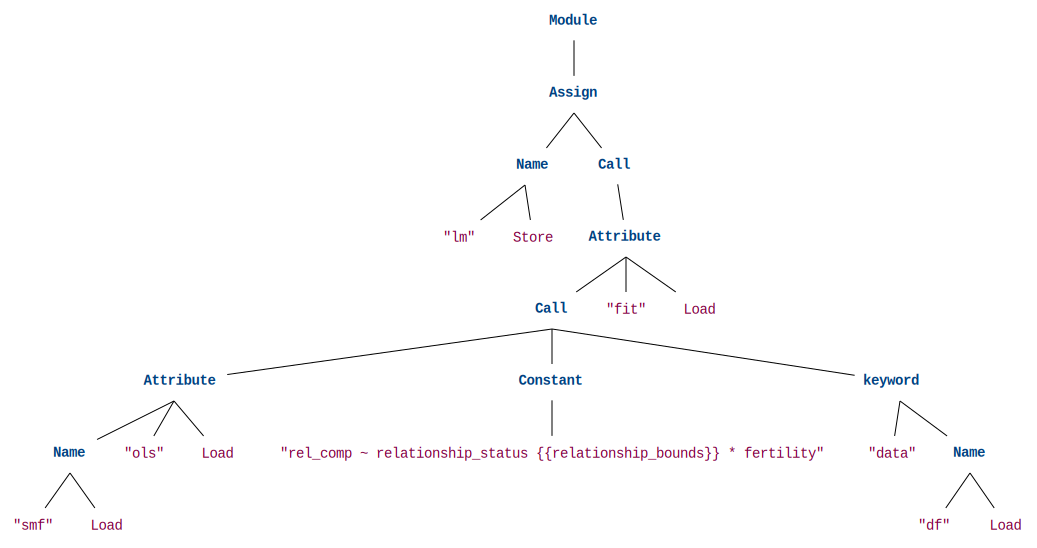

In [30]:
code = """lm = smf.ols('rel_comp ~ relationship_status {{relationship_bounds}} * fertility', data=df).fit()"""
graph_ast.viz_code(code)

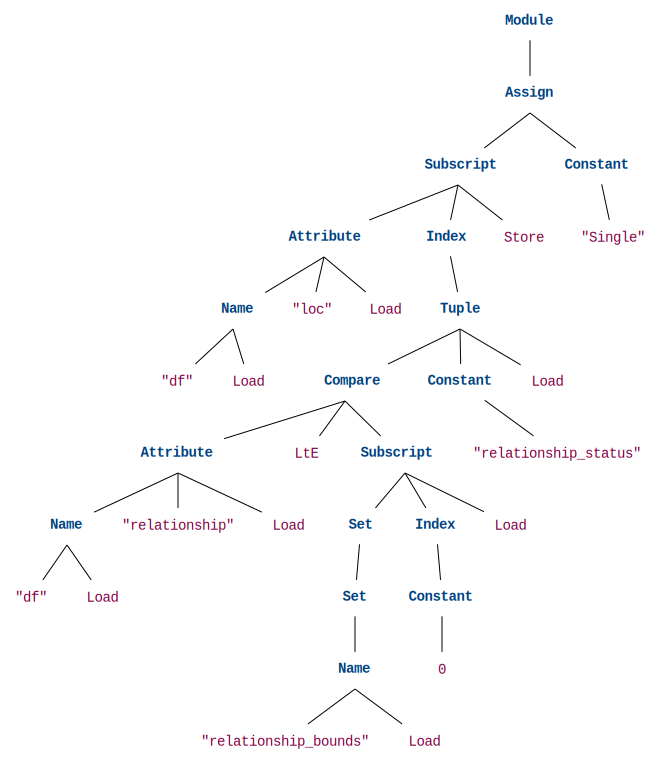

In [33]:
code = """df.loc[df.relationship <= ({{relationship_bounds}})[0],
'relationship_status'] = 'Single'"""
graph_ast.viz_code(code)

In [ ]:
code = """df.loc[df.relationship <= ([1, 2])[0],
           'relationship_status'] = 'Single'\nb=15"""
graph_ast.viz_code(code)